In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from data.load_all_datasets import load_data_train_test
from genetic import GeneticExtractor

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

np.random.seed(1337)  # Random seed for reproducibility

In [2]:
# Load in all datasets and sort them by complexity
metadata = sorted(
    load_data_train_test(), 
    key=lambda x: x['train']['n_samples']**2*x['train']['n_features']**3  # O(n**2 * m**3)
)
dataset = metadata[0]  # Take the dataset which is expected to take the least long 

In [3]:
# Read in the datafiles, split them into features and labels
train_df = pd.read_csv(dataset['train']['data_path'])
test_df = pd.read_csv(dataset['test']['data_path'])
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

# Map the labels to the range [0, ..., C-1] with C the number of classes
map_dict = {}
for j, c in enumerate(np.unique(y_train)):
    map_dict[c] = j
y_train = y_train.map(map_dict) 
y_test = y_test.map(map_dict)

# Convert everything to numpy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

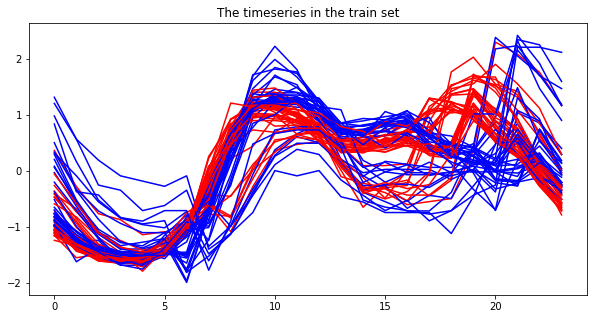

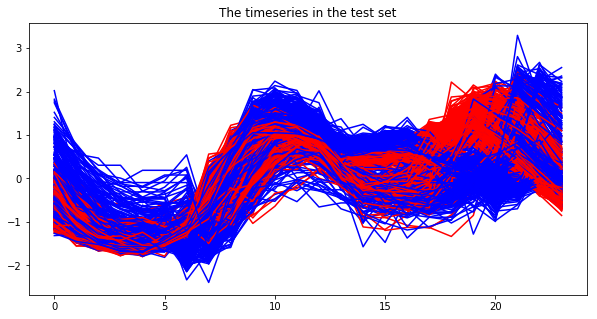

In [4]:
# Visualize the timeseries in the train and test set
colors = ['r', 'b', 'g', 'y', 'c']

plt.figure(figsize=(10, 5))
for ts, label in zip(X_train, y_train):
    plt.plot(range(len(ts)), ts, c=colors[label%len(colors)])
plt.title('The timeseries in the train set')
plt.show()

plt.figure(figsize=(10, 5))
for ts, label in zip(X_test, y_test):
    plt.plot(range(len(ts)), ts, c=colors[label%len(colors)])
plt.title('The timeseries in the test set')
plt.show()

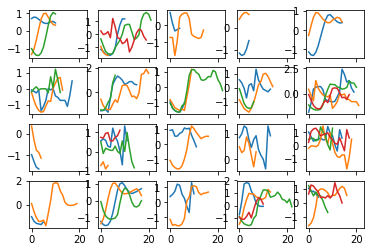

it		avg		std		max		time
1		-0.4504		0.123		-0.273226	9.6902


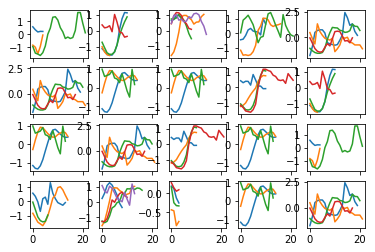

2		-0.4392		0.091		-0.273226	6.5278


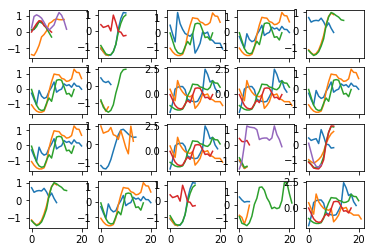

3		-0.3521		0.1		-0.273226	8.0169


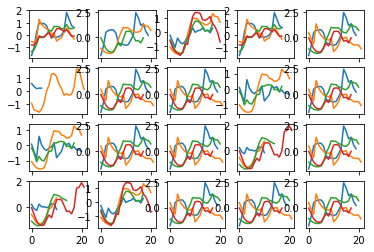

4		-0.3324		0.083		-0.263742	5.5967


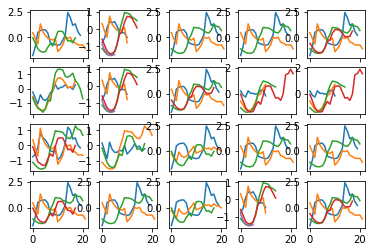

5		-0.3504		0.094		-0.248046	7.0973


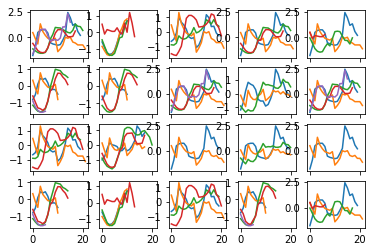

6		-0.3557		0.113		-0.248046	5.942


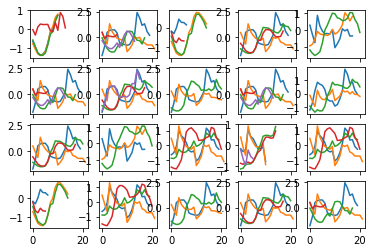

7		-0.3604		0.099		-0.245366	8.5502


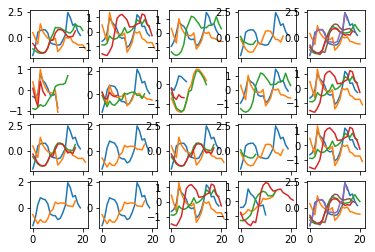

8		-0.3399		0.085		-0.245366	6.1108


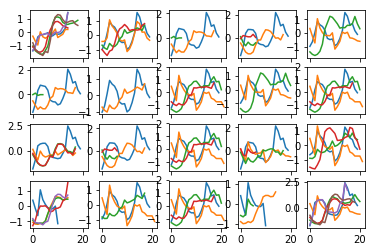

9		-0.2914		0.071		-0.187819	5.8859


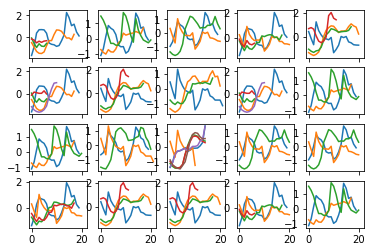

10		-0.2653		0.068		-0.187819	5.6484


In [5]:
# Extract the shapelets. Enable both verbosity and plotting
genetic_extractor = GeneticExtractor(verbose=True, population_size=20, iterations=10, plot='notebook')
shapelets = genetic_extractor.fit(X_train, y_train)

In [6]:
# Calculate distances from timeseries to extracted shapelets and fit a Logistic Regression model
distances_train = genetic_extractor.transform(X_train)
distances_test = genetic_extractor.transform(X_test)

lr = LogisticRegression()
lr.fit(distances_train, y_train)

print('Accuracy = {}'.format(accuracy_score(y_test, lr.predict(distances_test))))

Accuracy = 0.9475218658892128
